# 1. Domača Naloga

## Naloga 1: Linearna regresija

1.a: Dopolni funkcijo `najdi_koeficiente`, ki vrne optimalne vrednosti koeficientov modela linearne regresije. Pomagaj si s prosojnicami iz predavanj, funkcijo za izračun inverza matrike `numpy.linalg.inv(array)` in operatorjem matričnega množenja, `numpy.matmul(array1, array2)` ali `@`. Pravilnost dopolnjene funkcije lahko preveriš s spodnjo kodo. 

Kakšne optimalne vrednosti koeficientov si pričakoval/a in kakšne si dobil/a? 

In [61]:
import numpy as np

In [62]:
def najdi_koeficiente(x_train: np.array, y_train: np.array):
    # Izračunaj optimalne vrednosit koeficientov in jih shrani v spremenljivko coefs
    coefs = np.linalg.inv(x_train.T @ x_train) @ x_train.T @ y_train
    return coefs

In [63]:
# Vzorčimo naključna števila v matriko dimenzij 1000x4,
# ki podaja vrednosti štirih napovednih spremenljivk
x = np.random.random((1000, 4))
# Izračunamo vrednosti ciljne spremenljivke z modelom y = x1 + 5 x2
y = x[:, 0] + 5*x[:, 1]
# Izračunamo optimalne vrednosti koeficientov linearnega modela
coefs = najdi_koeficiente(x, y)

# Preverimo, če je matrika coefs ustreznih dimenzij
assert coefs.shape == (4,)
# Izpišemo vrednosti koeficientov
print(coefs)

[ 1.00000000e+00  5.00000000e+00 -3.49720253e-15 -5.99520433e-15]


1.b Smiselno dopolni funkciji `najdi_koeficiente2` in `napovej` tako, da boš z njima lahko sestavil model, ki bo imel RMSE $< 10^{-10}$ na testnih podatkih, dobljenih z modelom $y = x_1 + 5x_2 + 12$. Pomagaš si lahko s funkcijo `numpy.concatnate(seznam stolpcev, axis=1)`.

In [64]:
from sklearn.metrics import mean_squared_error

In [65]:
def najdi_koeficiente2(x_train, y_train):
    # Izračunaj optimalne vrednosti koeficientov in jih shrani v spremenljivko coefs
    x_train = np.hstack((np.ones((x_train.shape[0], 1)), x_train))
    coefs = np.linalg.inv(x_train.T @ x_train) @ x_train.T @ y_train
    return coefs

In [66]:
def napovej(coefs, x_test):
    # Izračunaj napovedi linarnega modela z vrednostmi koeficientov coefs
    # za primere iz x_test in jih shrani v y_pred
    y_pred = x_test @ coefs[1:] + coefs[0]
    return y_pred

In [67]:
# Vzorčimo matriko naključnih števil velikosti 1000x4
x = np.random.random((1000, 4))
# Definiramo ciljno spremenljivko
y = x[:, 0] + 5*x[:, 1] + 12
# Najdemo koeficiente
coefs = najdi_koeficiente2(x, y)

# Izpišemo koeficiente, funkcijo "{nekej}".join(seznam nizov) pretvori seznam nizov v niz oblike: "{seznam[0]}{nekej}{seznam[1]}{nekej}...{nekej}{seznam[-1]}"
# Funkcija np.round(stevilo, celo število) zaokrozi število na "celo število" decimalnih mest
print(f"Coeficients: {', '.join([str(np.round(c, 3)) for c in coefs])}")

# Vzorčimo matriko naključnih števil velikosti 1000x4 za testno množico
x_test = np.random.random((1000, 4))
# Izračunamo ciljno spremenljivko
y_test = x_test[:, 0] + 5*x_test[:, 1] + 12
# Napovemo cilne vrednosti za testne napovedne podatke 
y_pred = napovej(coefs, x_test)
# Izračunamo RMSE testnih napovedi
error = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {error}")
# Preverimo, da je napaka manjša od 10^{-10}
assert error < 1e-10

Coeficients: 12.0, 1.0, 5.0, -0.0, -0.0
RMSE: 2.703846189477839e-14


1.c: Naloži podatkovno množico iz datoteke `dn1_1.npy` in jo razdeli na podatke o napovednih spremenljivkah $x$ in podatke o ciljni spremenljivki $y$. Ciljna spremenljivka je v zadnjem stolpcu datoteke s podatkovno množico.

In [68]:
d1 = np.load('dn1_1.npy')
X = d1[:,:-1]
y = d1[:, -1].reshape(-1, 1)
print(X.shape, y.shape)

(2000, 5) (2000, 1)


1.d: Čim bolje oceni točnost (ali napako) napovednega modela iz naloge 1.b. Predpostavi, da bo model naučen na vseh podatkih iz naloge 1.c in da bodo novi podatki prihajali iz iste domene (in verjetnostne porazdelitve) kot učni podatki.

In [69]:
# Ocenimo napako modela z metodo zankanja (Bootstrap)

errors = []

for i in range(10000):
    idx = np.random.choice(X.shape[0], X.shape[0], replace=True)
    X_train = X[idx]
    y_train = y[idx]
    coefs = najdi_koeficiente2(X_train, y_train)
    y_pred = napovej(coefs, X[~idx])
    errors.append(np.sqrt(mean_squared_error(y[~idx], y_pred)))
np.mean(errors)

0.24063274273552396

## Naloga 2: Logistična regresija

2.a: Preberi podatkovno množico z diskretno ciljno spremenljivko iz datoteke `dn1_2.npz` (pomagaš si lahko z nalogo 2 iz vaj 3). Izračunaj nekaj preprostih statistik za vsako spremenljivko (stolpec) in podatke po potrebi predprocesiraj za potrebe učenja linearnega modela.

In [70]:
d2 = np.load('dn1_2.npz')
X = d2['x']
y = d2['y']

# Povprecna vrednost spremenljivk
X_mean = np.mean(X, axis=0)
print("Mean: ", X_mean)

# Standardni odklon spremenljivk
X_std = np.std(X, axis=0)
print("Standard deviation: ", X_std)

# Kvartili spremenljivk 
X_q = np.quantile(X, [0.25, 0.5, 0.75], axis=0)
print("Quantiles: ", X_q)

# Normaliziraj podatke
X_norm = (X - np.mean(X, axis=0)) / np.std(X, axis=0)


Mean:  [-0.01664422  3.93709115  5.49976384  0.98036683  1.48634641  0.59712199
  0.74531457  0.50850014]
Standard deviation:  [1.76899549 2.90060088 0.85557046 0.56830939 1.44224079 0.23137687
 0.14472136 0.28875373]
Quantiles:  [[-1.55322015  1.39949574  4.76044785  0.49233866  0.22268825  0.39406743
   0.6122823   0.25612893]
 [-0.06375526  3.84917229  5.48381429  0.96489185  1.47748935  0.5900379
   0.74912656  0.51148163]
 [ 1.5777605   6.45473438  6.24392828  1.46454515  2.74878036  0.79782948
   0.86835291  0.75839118]]


2.b: Ovrednoti točnost (napako) in stabilnost modela logistične regresije. Poskrbi, da bodo eksperimenti ponovljivi in točnost modela čim bolje ocenjena. Če uporabiš prečno preverjanje, naj število vzorcev ne presega 10.

In [71]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

np.random.seed(42)
 
logreg = LogisticRegression()
kf = KFold(n_splits=10, shuffle=True)
scores = []


for i, (train_index, test_index) in enumerate(kf.split(X_norm, y)):
    # Razdeli na učno in testno množico
    x_train, x_test = X_norm[train_index], X_norm[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Učenje modela
    logreg.fit(x_train, y_train)

    # Napovedovanje in ocenjevanje
    acc = accuracy_score(y_test, logreg.predict(x_test))
    scores.append(acc)
    print("Accuracy score:", acc)
print("Average accuracy:", np.mean(scores))

Accuracy score: 0.96
Accuracy score: 0.95
Accuracy score: 0.96
Accuracy score: 0.955
Accuracy score: 0.965
Accuracy score: 0.975
Accuracy score: 0.955
Accuracy score: 0.96
Accuracy score: 0.96
Accuracy score: 0.95
Average accuracy: 0.959


2.c: Domenski ekspert vam je namignil, da je vrednost ciljne spremenljivke korelirana s kvadratom prve napovedne spremenljivke (X[:, 0]) in produktom prvih treh napovednih sprememnljivk (X[:, 0], X[:, 1], X[:, 2]). Ali lahko namig uporabiš za izboljšanje modela logistične regresije? Če ga lahko, ovrednoti izboljšanje.

Opomba: Opozorilu o problemu s konvergenco se lahko izognete tako, da povečate število iteracij logistične regresije (npr. na 1000).

In [72]:
np.random.seed(42)
# Dodajanje novih spremenljivk 
new_features = np.column_stack((X[:, 0]**2, X[:, 0]*X[:, 1]*X[:, 2]))
X_new = np.hstack((X, new_features))
scores = []

# Normaliziraj podatke
X_new_norm = (X_new - np.mean(X_new, axis=0)) / np.std(X_new, axis=0)

for i, (train_index, test_index) in enumerate(kf.split(X_new_norm, y)):
    # Razdeli na učno in testno množico
    x_train, x_test = X_new_norm[train_index], X_new_norm[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Učenje modela
    logreg.fit(x_train, y_train)

    # Napovedovanje in ocenjevanje
    acc = accuracy_score(y_test, logreg.predict(x_test))
    scores.append(acc)
    print("Accuracy score:", acc)
print("Average accuracy:", np.mean(scores))

# Shranim popvprecno natancnost za nalogo 2.d
avgAcc = np.mean(scores)

Accuracy score: 0.99
Accuracy score: 0.975
Accuracy score: 0.99
Accuracy score: 0.98
Accuracy score: 0.985


Accuracy score: 0.99
Accuracy score: 0.995
Accuracy score: 0.99
Accuracy score: 0.995
Accuracy score: 0.985
Average accuracy: 0.9874999999999998


2.d: Ali lahko s pomočjo logistične regresije ugotoviš nabor napovednih spremenljivk, ki za klasifikacijo niso pomembne? Če lahko ugotoviš, potem poročaj katere spremenljivke so v tem naboru, zakaj sodiš, da so v njem, in kakšna je točnost modela logistične regresije, če jih odstraniš iz podatkovne množice? 

Ali se rezultati med prejšnjim in sedanjim modelom zelo razlikujejo? Kaj je po tvoje razlog za to?

Coefficient mean: [7.34061997 2.49004897 1.73079843 0.09200572 0.01751152 1.49952989
 0.05277084 0.13289069 0.16238656 0.52924191 7.16006743]


C:\Users\38651\AppData\Local\Temp\ipykernel_11376\3691967194.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  coefs[i, 0] = logreg.intercept_
C:\Users\38651\AppData\Local\Temp\ipykernel_11376\3691967194.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  coefs[i, 0] = logreg.intercept_
C:\Users\38651\AppData\Local\Temp\ipykernel_11376\3691967194.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  coefs[i, 0] = logreg.intercept_
C:\Users\38651\AppData\Local\Te

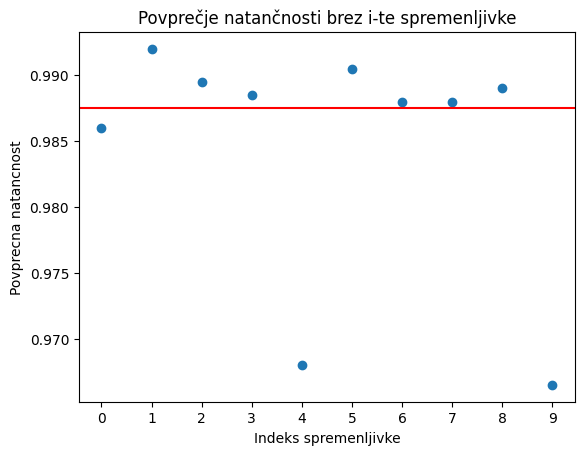

Accuracy of models trained on variables 0, 1, 4, 9 based on criteria 1.)
Accuracy score 1: 0.99
Accuracy score 1: 0.985
Accuracy score 1: 0.995
Accuracy score 1: 0.98
Accuracy score 1: 0.98
Accuracy score 1: 0.99
Accuracy score 1: 0.99
Accuracy score 1: 0.99
Accuracy score 1: 0.985
Accuracy score 1: 0.98
Average accuracy 1: 0.9846 

Accuracy of models trained on variables 0, 4, 9 based on criteria 2.)
Accuracy score 2: 0.985
Accuracy score 2: 1.0
Accuracy score 2: 0.985
Accuracy score 2: 0.98
Accuracy score 2: 0.98
Accuracy score 2: 0.995
Accuracy score 2: 0.985
Accuracy score 2: 0.98
Accuracy score 2: 0.975
Accuracy score 2: 0.99
Average accuracy 2: 0.9846


In [73]:
# Tukaj bom izbral dva pristopa, za dolocanje pomembnosti napovednih spremenljivk

np.random.seed(42)

# 1.) Pogledal bom absolutne vrednosti koeficientov pred posameznimi spremenljivkami v modelu in na podlagi teh
# (ker so spremenljivke ze normalizirane) skelpal o pomembnosti posameznih spremeljivk

coefs = np.zeros((10, X_new_norm.shape[1] + 1))
for i, (train_index, test_index) in enumerate(kf.split(X_new_norm, y)):
    # Razdeli na učno in testno množico
    x_train, x_test = X_new_norm[train_index], X_new_norm[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Učenje modela
    logreg.fit(x_train, y_train)
    coefs[i, 0] = logreg.intercept_
    coefs[i, 1:] = logreg.coef_

# Vzemi absolutno vrednost koeficientov in izracunaj povprecje
coefs = np.absolute(coefs)
print(f"Coefficient mean: {np.mean(coefs, axis=0)}")

# 2.) Treniral bom toliko modelov kot je spremenljivk (s tem da bom v modelu i izvzel i-to spremenljivko)
# in gledal vpade v natancnosti. Glede na velikost vpadov bom dolocil pomembnost posameznih spremenljivk za napoved. 

scores = np.zeros((10, 10))

for i in range(10):
    for j, (train_index, test_index) in enumerate(kf.split(X_new_norm, y)):
        # Razdeli na učno in testno množico
        x_train, x_test = X_new_norm[train_index], X_new_norm[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Odstrani i-to spremenljivko
        x_train, x_test = np.delete(x_train, i, axis=1), np.delete(x_test, i, axis=1)

        # Učenje modela
        logreg.fit(x_train, y_train)
        
        # Napovedovanje in ocenjevanje
        acc = accuracy_score(y_test, logreg.predict(x_test))
        scores[i, j] = acc

import matplotlib.pyplot as plt

# Izracun povprecnih napak
avg_scores = np.mean(scores, axis=1)

# Izris napak napsproti povprecni napaki modela, ki uposteva vse spremenljivke
plt.plot(range(10), avg_scores, 'o')
plt.axhline(avgAcc, color="red")
plt.xlabel('Indeks spremenljivke')
plt.ylabel('Povprecna natancnost')
plt.title('Povprečje natančnosti brez i-te spremenljivke')
plt.xticks(range(10),range(10))
plt.show()

# Test modelov kjer odstanimo "nepomembne" spremenljivke

# 1.) Odstranimo vse razen prve, druge, pete in zadnje spremenljivke
print('Accuracy of models trained on variables 0, 1, 4, 9 based on criteria 1.)')
scores1 = []
X_new_1 = X_new_norm[:, [0, 1, 4, -1]]
for i, (train_index, test_index) in enumerate(kf.split(X_new_1, y)):
    # Razdeli na učno in testno množico
    x_train, x_test = X_new_norm[train_index], X_new_norm[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Učenje modela
    logreg.fit(x_train, y_train)

    # Napovedovanje in ocenjevanje
    acc = accuracy_score(y_test, logreg.predict(x_test))
    scores1.append(acc)
    print("Accuracy score 1:", acc)
print("Average accuracy 1:", np.mean(scores), '\n')

# 2.) Odstranimo vse razen prve, pete in 10 spremenljivke
print('Accuracy of models trained on variables 0, 4, 9 based on criteria 2.)')
scores2 = []
X_new_2 = X_new_norm[:, [0, 4, -1]]
for i, (train_index, test_index) in enumerate(kf.split(X_new_2, y)):
    # Razdeli na učno in testno množico
    x_train, x_test = X_new_norm[train_index], X_new_norm[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Učenje modela
    logreg.fit(x_train, y_train)

    # Napovedovanje in ocenjevanje
    acc = accuracy_score(y_test, logreg.predict(x_test))
    scores2.append(acc)
    print("Accuracy score 2:", acc)
print("Average accuracy 2:", np.mean(scores))

## Naloga 3: K-najbližjih sosedov

3.a: Preberi podatkovno množico z diskretno ciljno spremenljiko iz datoteke `dn1_3.npz`.  

In [74]:
d3 = np.load('dn1_3.npz')
X = d3['x']
y = d3['y']
print(X.shape, y.shape)

(53940, 11) (53940,)


3.b: Sestavi napovedni model k-najbližjih sosedov s čim nižjim RMSE-jem. Poskrbi, da poleg ocene točnosti modela, poročaš tudi stabilnost ocene. Opiši, kakšen je tvoj model in kako/zakaj si se odločil za vsako izbiro. Opiši tudi eksperimente, ki si jih poskusil/a, a niso izboljšali rezultata.

Opomba: Pomen spremenljivk je sledeč:
- $x_1$: Zaporedna številka diamanta v bazi
- $x_2$: Število karatov
- $x_3$: Procent globine diamanta ($\frac{2\cdot z}{x+y}$)
- $x_4$: Razmerje med širino vrha in najširšo točko
- $x_5$: Dolžina diamanta
- $x_6$: Širina diamanta
- $x_7$: Globina diamanta
- $x_8$: Kvaliteta brusa ("Ideal": 4, "Premium": 3, "Very Good": 2, "Good": 1, "Fair": 0)
- $x_{9}$: Barva ("D": 0, "E": 1, "F": 2, "G": 3, "H": 4, "I": 5, "J":6)
- $x_{10}$: Čistost ("I1": 0, "SI2": 1, "SI1": 2, "VS2": 3, "VS1": 4, "VVS2": 5, "VVS1": 6, "IF": 7)
- $x_{11}$: Oddaljenost najdišča od ekvatorja
- $y$: Cena diamanta



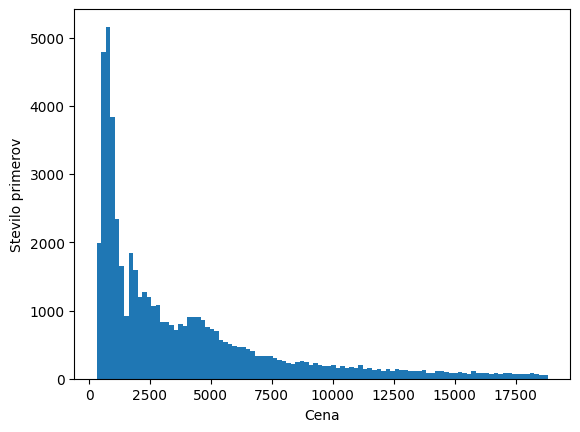

In [75]:
# Logika, normalizacija, dummy varables, dolocitev k-ja
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42)

# Odstranimo prvo spremenljivko, saj ocitno vsebinsko ni relevantna (tudi ce bi bila slucajno korelirana numericno)
X = X[:, 1:]

# Normaliziraj podatke	
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Histogram y spremenljivke
plt.hist(y, bins=100)
plt.xlabel('Cena')
plt.ylabel('Stevilo primerov')
plt.show()


In [76]:
# Pearsonov korelacijski koeficient posameznih spremenljivk s ciljno spremenljivko
df = pd.DataFrame(X)
stolpci = ["stKaratov", "globina%", "razmerjeSirinaVrhaNajsirsaTocka", 
    "dolzina", "sirina", "globina", "kvalitetaBrusa", "barva", "cistost", "oddaljenostEkvator"]
df.columns = stolpci
df['price'] = y
corr = df.corr()
print(corr['price'])

stKaratov                          0.921591
globina%                          -0.010647
razmerjeSirinaVrhaNajsirsaTocka    0.127134
dolzina                            0.884435
sirina                             0.865421
globina                            0.861249
kvalitetaBrusa                    -0.053491
barva                              0.172511
cistost                           -0.146800
oddaljenostEkvator                -0.005257
price                              1.000000
Name: price, dtype: float64


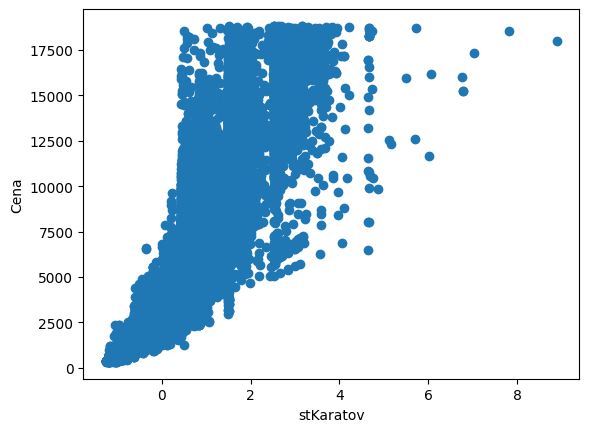

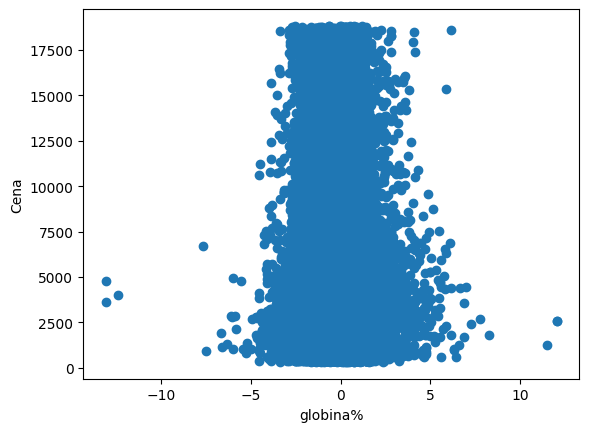

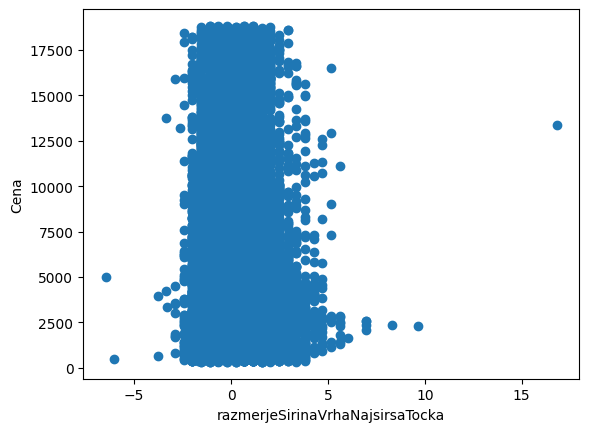

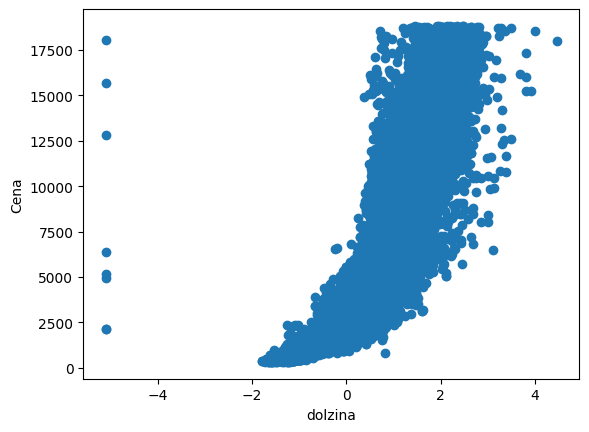

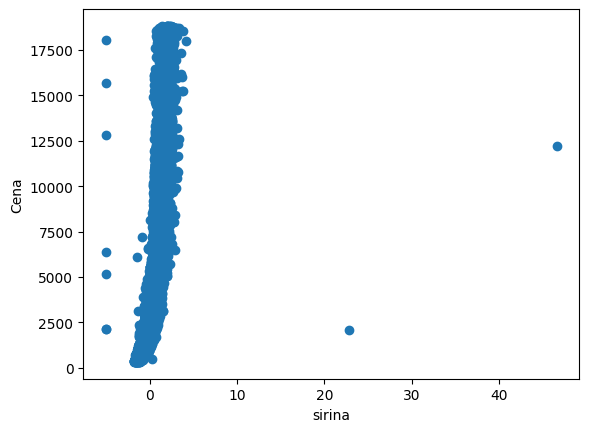

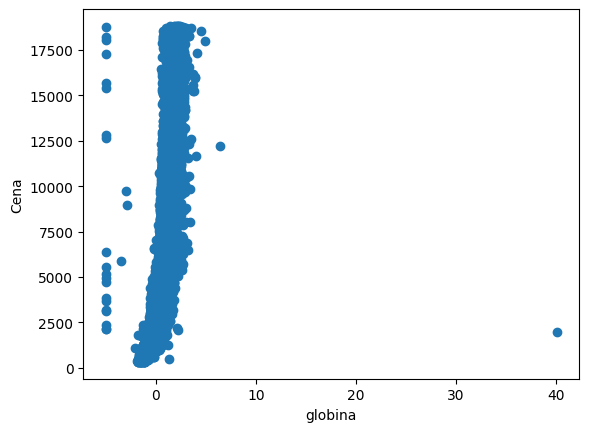

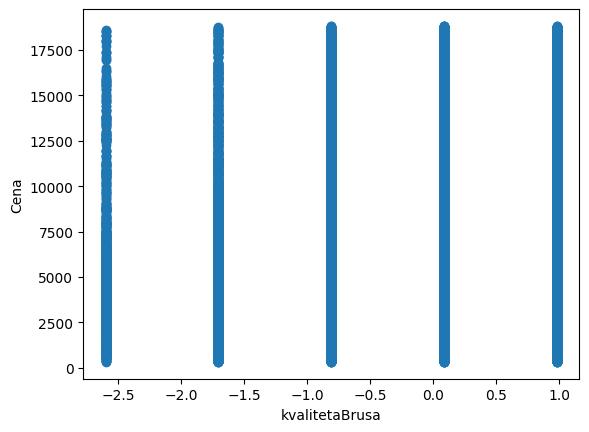

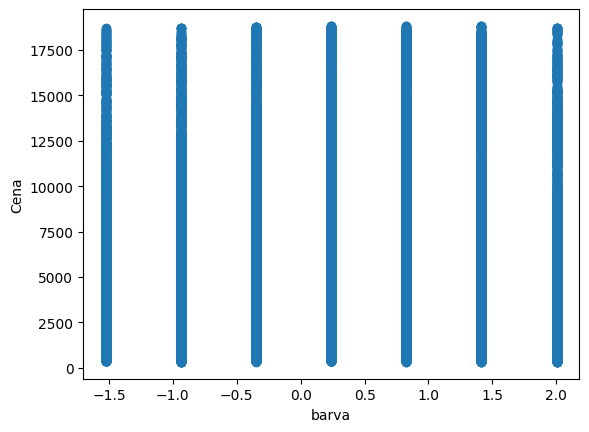

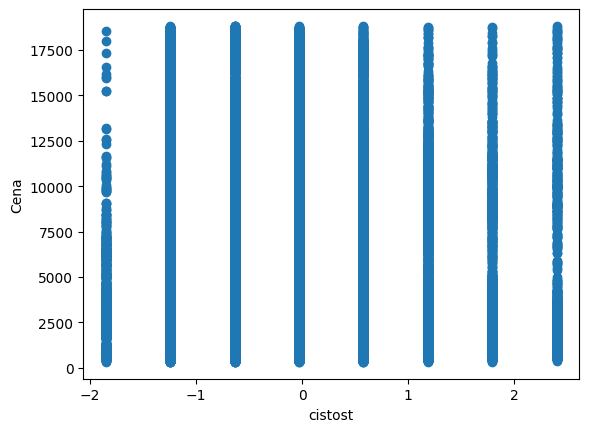

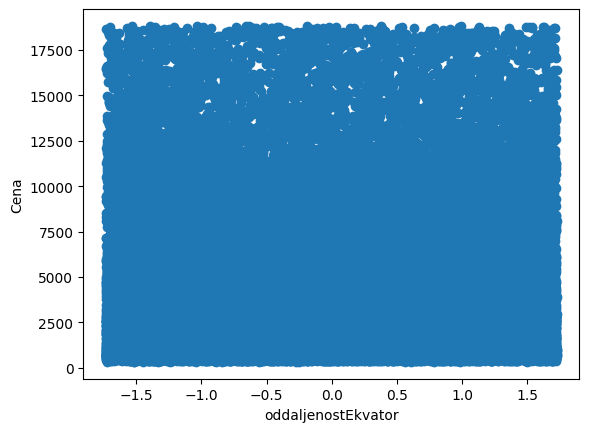

In [77]:
# Grafi korelacij napovednih spremenljivk s ciljno spremenljivko
for i in range(X.shape[1]):
    plt.scatter(X[:, i], y)
    plt.xlabel(stolpci[i])
    plt.ylabel("Cena")
    plt.show()

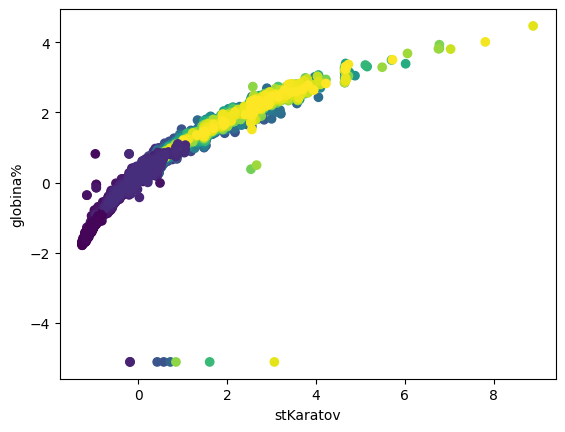

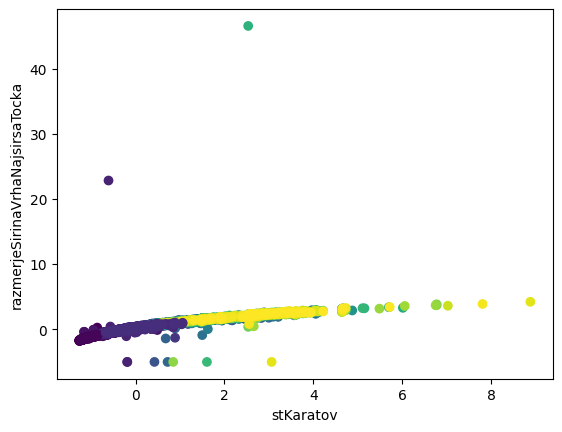

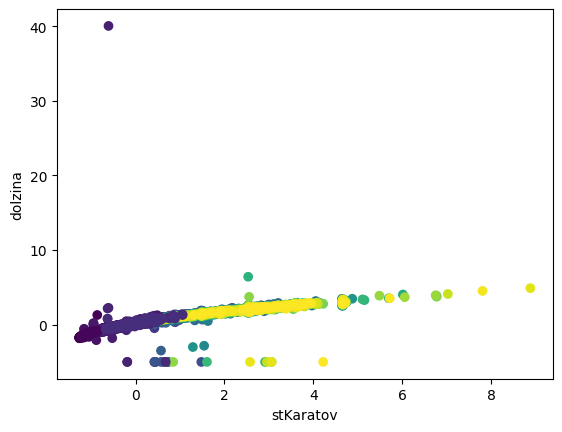

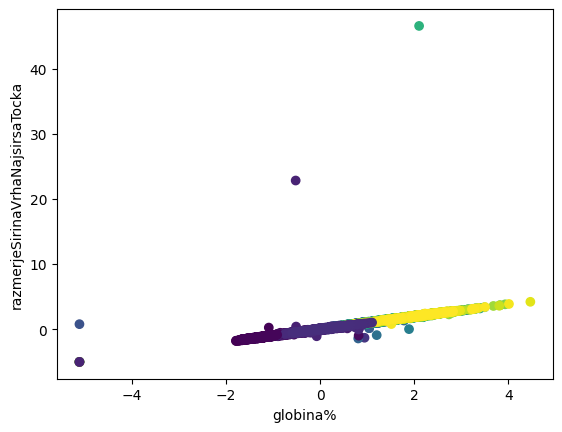

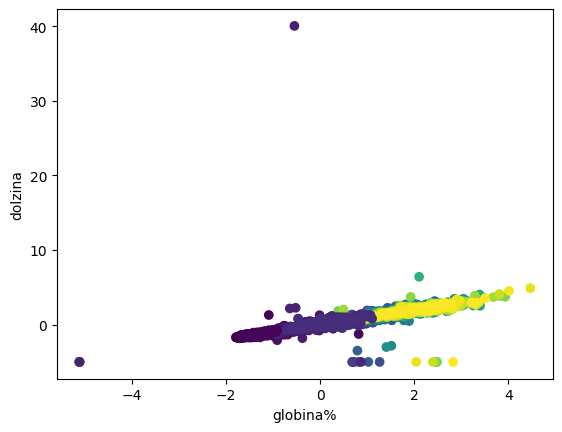

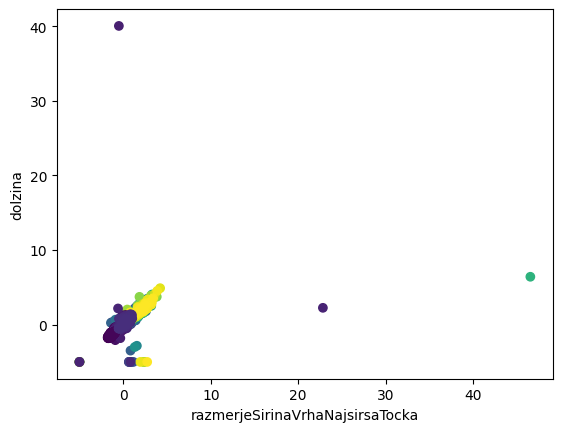

In [83]:
# Obdrzimo spremenljivke, ki imajo korelacijo s ciljno spremenljivko vecjo od 0.5 (absolutna vrednost)
# Obdrzimo: stKaratov, dolzina, sirina, globina
#X = X[:, [0, 3, 4, 5]]

# Pogledamo "locenost" podatkov
for (i, j) in [(i, j) for i in range(X.shape[1]) for j in range(X.shape[1]) if i < j]:
    plt.scatter(X[:, i], X[:, j], c=y)
    plt.xlabel(stolpci[i])
    plt.ylabel(stolpci[j])
    plt.show()


In [85]:
# Natreniramo model in izracunamo napako
knn = KNeighborsClassifier(n_neighbors=5)
kf = KFold(n_splits=10, shuffle=True)
scores = []

for i, (train_index, test_index) in enumerate(kf.split(X, y)):
    # Razdeli na učno in testno množico
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Učenje modela
    knn.fit(x_train, y_train)

    # Napovedovanje in ocenjevanje
    acc = np.sqrt(mean_squared_error(y_test, knn.predict(x_test)))
    scores.append(acc)
    print("Accuracy score:", acc)


Accuracy score: 1977.2626384327987
Accuracy score: 1918.1443680411878
Accuracy score: 2034.1590139308794
Accuracy score: 1981.2571197510763
Accuracy score: 2018.8237991185072
Accuracy score: 1992.977253545043
Accuracy score: 2008.365293286856
Accuracy score: 1990.850388588796
Accuracy score: 2005.6240113301094
Accuracy score: 1977.3064918561245
